In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 1.导入sklearn中自带的Iris数据集
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


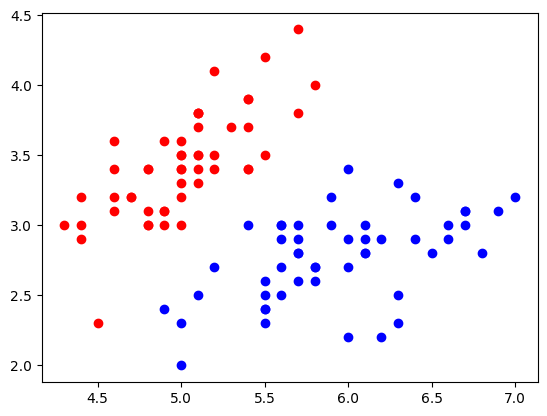

In [25]:
plt.scatter(X[y==0, 0], X[y==0, 1],color='red')
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue')

In [8]:
# 2.数据标准化处理:防止样本中不同特征数值大小相差较大影响分类器性能
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [26]:
# 使用sklearn.svm.LinearSVC训练
from sklearn.svm import LinearSVC
# 构建线性SVM模型
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [27]:
# 4.封装绘制决策边界函数
def plot_svc_decision_boundary(model, axis):
#     生成网格点坐标矩阵（用于绘制图背景）
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
                        )
    X_new = np.c_[x0.ravel(),x1.ravel()]
#     对画布上每个点判断其所属的类别
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF59D','90CAF9'])
#     不同的类别选择不同颜色绘制图像背景
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)
#     绘制上下两条决策边界线
    w = model.coef_[0]
    b = model.intercept_[0]    
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x -b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x -b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])  
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')    

In [21]:
# 调整参数，观察对结果的影响
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

/tmp/ipykernel_35/3886842329.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)


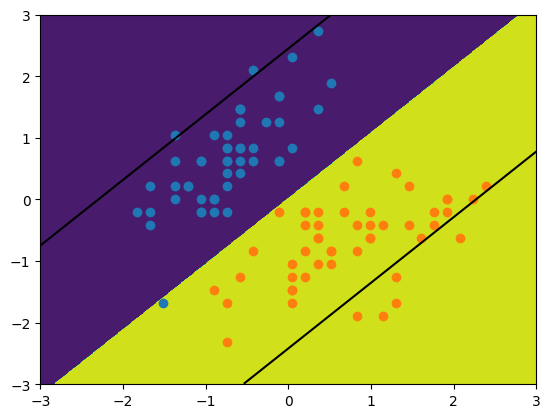

In [24]:
# 绘制图像
plot_svc_decision_boundary(svc2, axis=[-3,3,-3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])